In [1]:
# predict the claim amount

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width',1000)

In [3]:
claim=pd.read_csv('insurance_claim.csv')
claim.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [4]:
claim.shape

(9134, 26)

In [5]:
claim.isnull().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [6]:
claim.dtypes

Customer                          object
Country                           object
State Code                        object
State                             object
Claim Amount                     float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Claim Reason                      object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class   

In [8]:
claim.columns=claim.columns.str.replace(' ','_')

In [10]:
claim['Customer'].nunique()

9134

In [11]:
# drop customer
claim.drop('Customer',axis=1,inplace=True)

In [12]:
claim['Effective_To_Date'].nunique()

59

In [13]:
claim['Effective_To_Date'].value_counts()

1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/3/11     178
1/31/11    178
1/20/11    173
2/26/11    169
1/28/11    169
2/19/11    168
1/5/11     167
2/27/11    167
1/11/11    166
2/4/11     164
2/10/11    161
2/28/11    161
1/2/11     160
1/29/11    160
1/21/11    160
2/3/11     158
2/5/11     158
2/22/11    158
2/7/11     157
2/12/11    156
1/23/11    155
2/1/11     154
1/18/11    154
1/15/11    153
1/14/11    152
1/25/11    151
2/11/11    151
1/7/11     151
2/2/11     149
1/8/11     149
2/18/11    149
2/25/11    149
2/21/11    148
1/1/11     148
1/24/11    147
1/9/11     146
1/13/11    145
1/30/11    145
2/6/11     144
2/23/11    143
1/6/11     143
1/16/11    142
2/13/11    139
2/16/11    139
2/24/11    139
2/9/11     137
1/22/11    136
2/17/11    136
2/8/11     134
2/20/11    132
2/15/11    130
1/12/11    126
1/4/11     115
Name: Effective_To_Date, dtype: int64

In [14]:
# let the date time remain as object only

In [15]:
claim.columns

Index(['Country', 'State_Code', 'State', 'Claim_Amount', 'Response', 'Coverage', 'Education', 'Effective_To_Date', 'EmploymentStatus', 'Gender', 'Income', 'Location_Code', 'Marital_Status', 'Monthly_Premium_Auto', 'Months_Since_Last_Claim', 'Months_Since_Policy_Inception', 'Number_of_Open_Complaints', 'Number_of_Policies', 'Policy_Type', 'Policy', 'Claim_Reason', 'Sales_Channel', 'Total_Claim_Amount', 'Vehicle_Class', 'Vehicle_Size'], dtype='object')

In [16]:
# there are 26 features

# EDA

# Univariate

In [17]:
claim.describe()

,Claim_Amount,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Total_Claim_Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,800.494047,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,687.096761,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,189.800768,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,399.425179,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,578.018220,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,896.216704,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,8332.538119,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [18]:
claim.describe()[['Claim_Amount','Income','Monthly_Premium_Auto','Months_Since_Last_Claim','Months_Since_Policy_Inception','Total_Claim_Amount']]

,Claim_Amount,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Total_Claim_Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,800.494047,37657.380009,93.219291,15.097000,48.064594,434.088794
std,687.096761,30379.904734,34.407967,10.073257,27.905991,290.500092
min,189.800768,0.000000,61.000000,0.000000,0.000000,0.099007
25%,399.425179,0.000000,68.000000,6.000000,24.000000,272.258244
50%,578.018220,33889.500000,83.000000,14.000000,48.000000,383.945434
75%,896.216704,62320.000000,109.000000,23.000000,71.000000,547.514839
max,8332.538119,99981.000000,298.000000,35.000000,99.000000,2893.239678


In [21]:
# cont_variable: 'Claim_Amount','Income','Monthly_Premium_Auto','Months_Since_Last_Claim','Months_Since_Policy_Inception',
#                'Total_Claim_Amount'

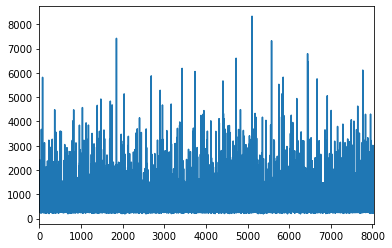

In [22]:
pd.Series(claim['Claim_Amount'].unique()).plot()

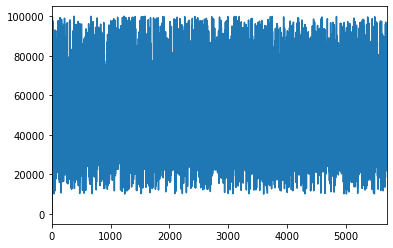

In [23]:
pd.Series(claim['Income'].unique()).plot()

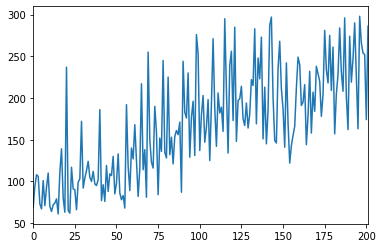

In [24]:
pd.Series(claim['Monthly_Premium_Auto'].unique()).plot()

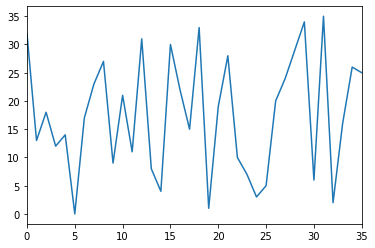

In [25]:
pd.Series(claim['Months_Since_Last_Claim'].unique()).plot()

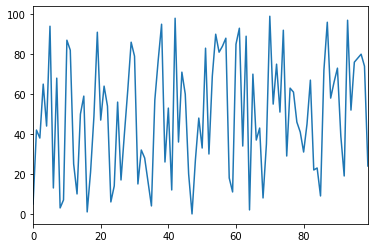

In [26]:
pd.Series(claim['Months_Since_Policy_Inception'].unique()).plot()

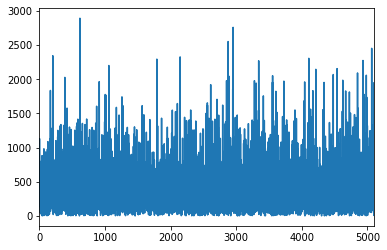

In [27]:
pd.Series(claim['Total_Claim_Amount'].unique()).plot()

In [28]:
# cat_variables: Number_of_Open_Complaints,Number_of_Policies,Country,State_Code,State,Response,Coverage,Education,
#                Effective_To_Date,EmploymentStatus,Gender,Location_Code,Marital_Status,Policy_Type,Policy,Claim_Reason,
#                Sales_Channel,Vehicle_Class,Vehicle_Class

In [29]:
claim['Number_of_Open_Complaints'].value_counts()

0    7252
1    1011
2     374
3     292
4     149
5      56
Name: Number_of_Open_Complaints, dtype: int64

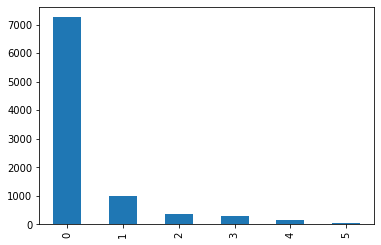

In [30]:
claim['Number_of_Open_Complaints'].value_counts().plot.bar()

In [40]:
# binning required

In [31]:
claim['Number_of_Policies'].value_counts()

1    3251
2    2294
3    1168
7     433
9     416
4     409
5     407
8     384
6     372
Name: Number_of_Policies, dtype: int64

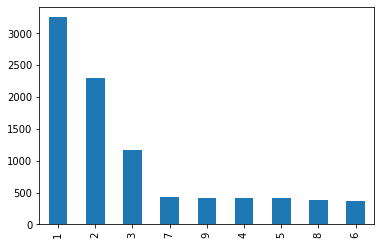

In [32]:
claim['Number_of_Policies'].value_counts().plot.bar()

In [33]:
claim['Country'].value_counts()

US    9134
Name: Country, dtype: int64

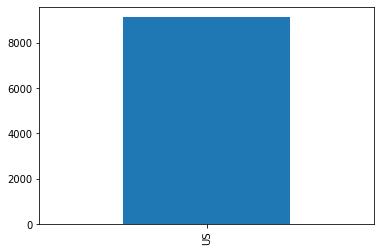

In [34]:
claim['Country'].value_counts().plot.bar()

In [39]:
# drop country

In [35]:
claim['State_Code'].value_counts()

MO    3150
IA    2601
NE    1703
OK     882
KS     798
Name: State_Code, dtype: int64

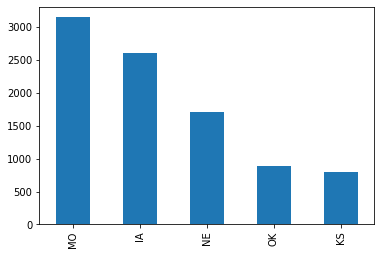

In [36]:
claim['State_Code'].value_counts().plot.bar()

In [37]:
claim['State'].value_counts()

Missouri    3150
Iowa        2601
Nebraska    1703
Oklahoma     882
Kansas       798
Name: State, dtype: int64

In [38]:
# drop state

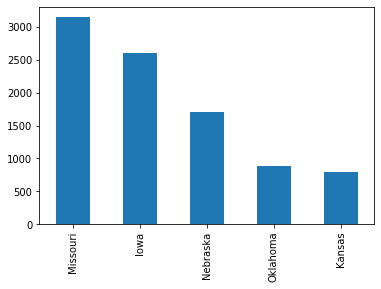

In [41]:
claim['State'].value_counts().plot.bar()

In [42]:
claim['Response'].value_counts()

No     7826
Yes    1308
Name: Response, dtype: int64

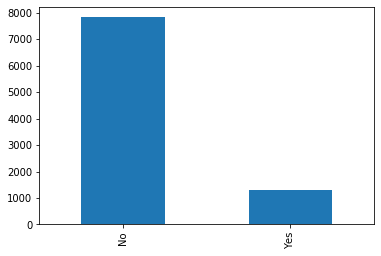

In [43]:
claim['Response'].value_counts().plot.bar()

In [44]:
claim['Coverage'].value_counts()

Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64

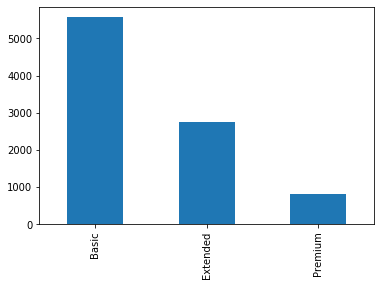

In [45]:
claim['Coverage'].value_counts().plot.bar()

In [46]:
claim['Education'].value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64

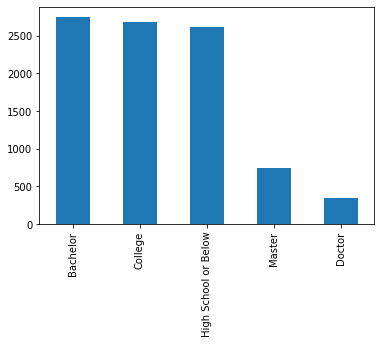

In [47]:
claim['Education'].value_counts().plot.bar()

In [48]:
claim['Effective_To_Date'].value_counts()

1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/3/11     178
1/31/11    178
1/20/11    173
2/26/11    169
1/28/11    169
2/19/11    168
1/5/11     167
2/27/11    167
1/11/11    166
2/4/11     164
2/10/11    161
2/28/11    161
1/2/11     160
1/29/11    160
1/21/11    160
2/3/11     158
2/5/11     158
2/22/11    158
2/7/11     157
2/12/11    156
1/23/11    155
2/1/11     154
1/18/11    154
1/15/11    153
1/14/11    152
1/25/11    151
2/11/11    151
1/7/11     151
2/2/11     149
1/8/11     149
2/18/11    149
2/25/11    149
2/21/11    148
1/1/11     148
1/24/11    147
1/9/11     146
1/13/11    145
1/30/11    145
2/6/11     144
2/23/11    143
1/6/11     143
1/16/11    142
2/13/11    139
2/16/11    139
2/24/11    139
2/9/11     137
1/22/11    136
2/17/11    136
2/8/11     134
2/20/11    132
2/15/11    130
1/12/11    126
1/4/11     115
Name: Effective_To_Date, dtype: int64

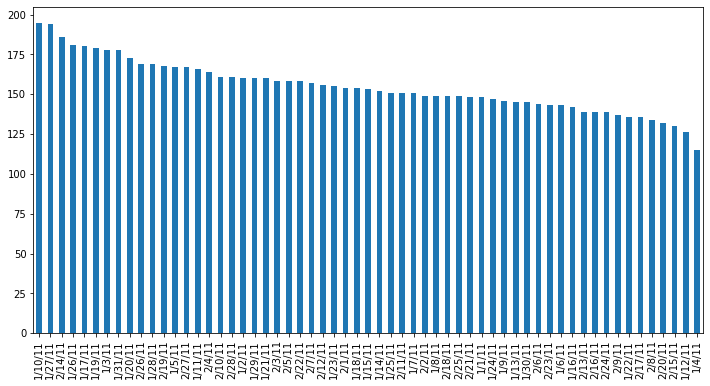

In [50]:
plt.figure(figsize=(12,6))
claim['Effective_To_Date'].value_counts().plot.bar()

In [51]:
claim['EmploymentStatus'].value_counts()

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EmploymentStatus, dtype: int64

In [52]:
# binning required

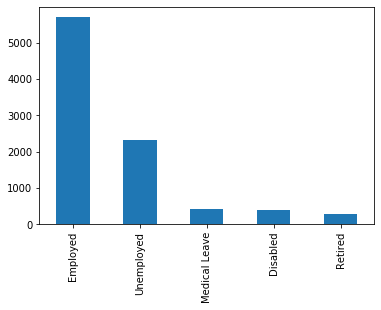

In [53]:
claim['EmploymentStatus'].value_counts().plot.bar()

In [54]:
claim['Gender'].value_counts()

F    4658
M    4476
Name: Gender, dtype: int64

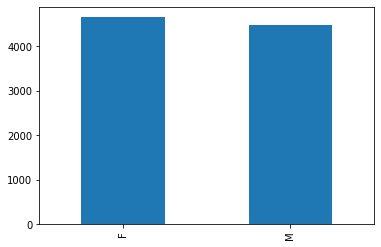

In [55]:
claim['Gender'].value_counts().plot.bar()

In [56]:
claim['Location_Code'].value_counts()

Suburban    5779
Rural       1773
Urban       1582
Name: Location_Code, dtype: int64

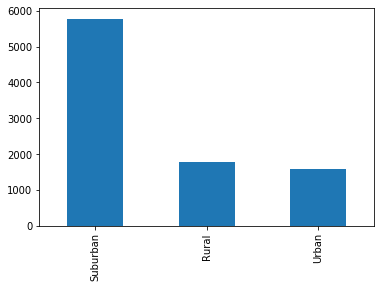

In [57]:
claim['Location_Code'].value_counts().plot.bar()

In [58]:
claim['Marital_Status'].value_counts()

Married     5298
Single      2467
Divorced    1369
Name: Marital_Status, dtype: int64

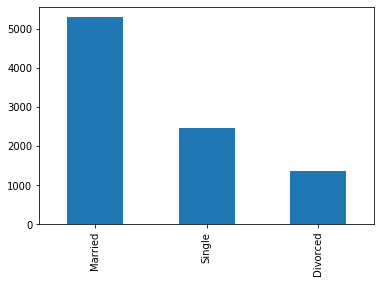

In [59]:
claim['Marital_Status'].value_counts().plot.bar()

In [60]:
claim['Policy_Type'].value_counts()

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: Policy_Type, dtype: int64

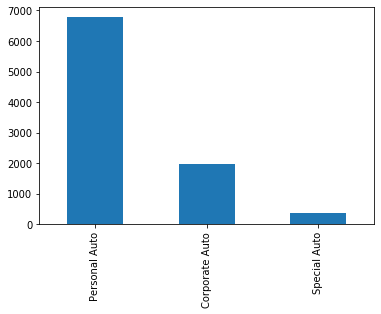

In [61]:
claim['Policy_Type'].value_counts().plot.bar()

In [62]:
claim['Policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: Policy, dtype: int64

In [63]:
# binning required

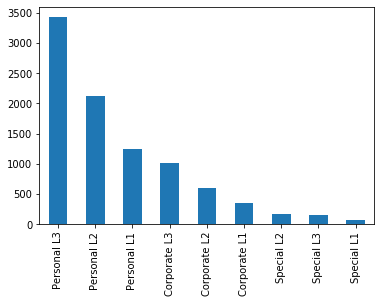

In [64]:
claim['Policy'].value_counts().plot.bar()

In [65]:
claim['Claim_Reason'].value_counts()

Collision       3752
Hail            2926
Scratch/Dent    1432
Other           1024
Name: Claim_Reason, dtype: int64

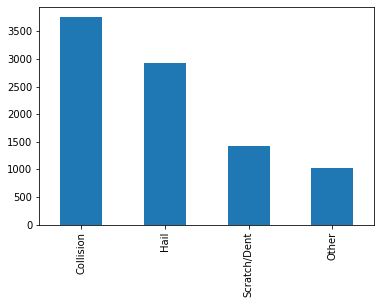

In [66]:
claim['Claim_Reason'].value_counts().plot.bar()

In [67]:
claim['Sales_Channel'].value_counts()

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: Sales_Channel, dtype: int64

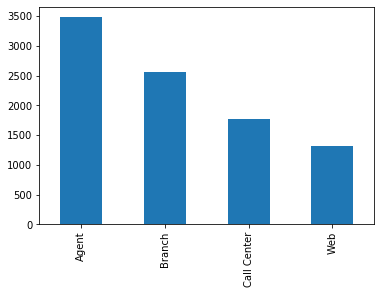

In [68]:
claim['Sales_Channel'].value_counts().plot.bar()

In [69]:
claim['Vehicle_Class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: Vehicle_Class, dtype: int64

In [70]:
# binning required

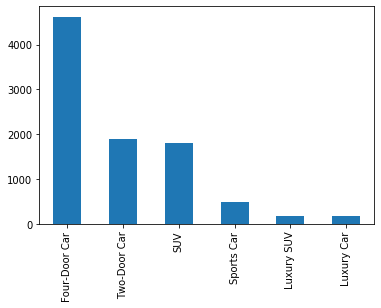

In [71]:
claim['Vehicle_Class'].value_counts().plot.bar()

In [72]:
claim['Vehicle_Size'].value_counts()

Medsize    6424
Small      1764
Large       946
Name: Vehicle_Size, dtype: int64

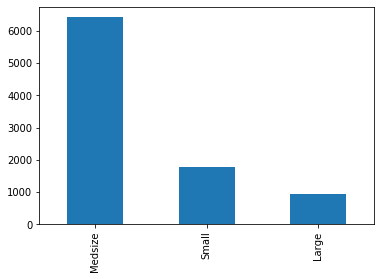

In [73]:
claim['Vehicle_Size'].value_counts().plot.bar()

# Bivariate

In [74]:
# cont_variable: 'Claim_Amount','Income','Monthly_Premium_Auto','Months_Since_Last_Claim','Months_Since_Policy_Inception',
#                'Total_Claim_Amount'

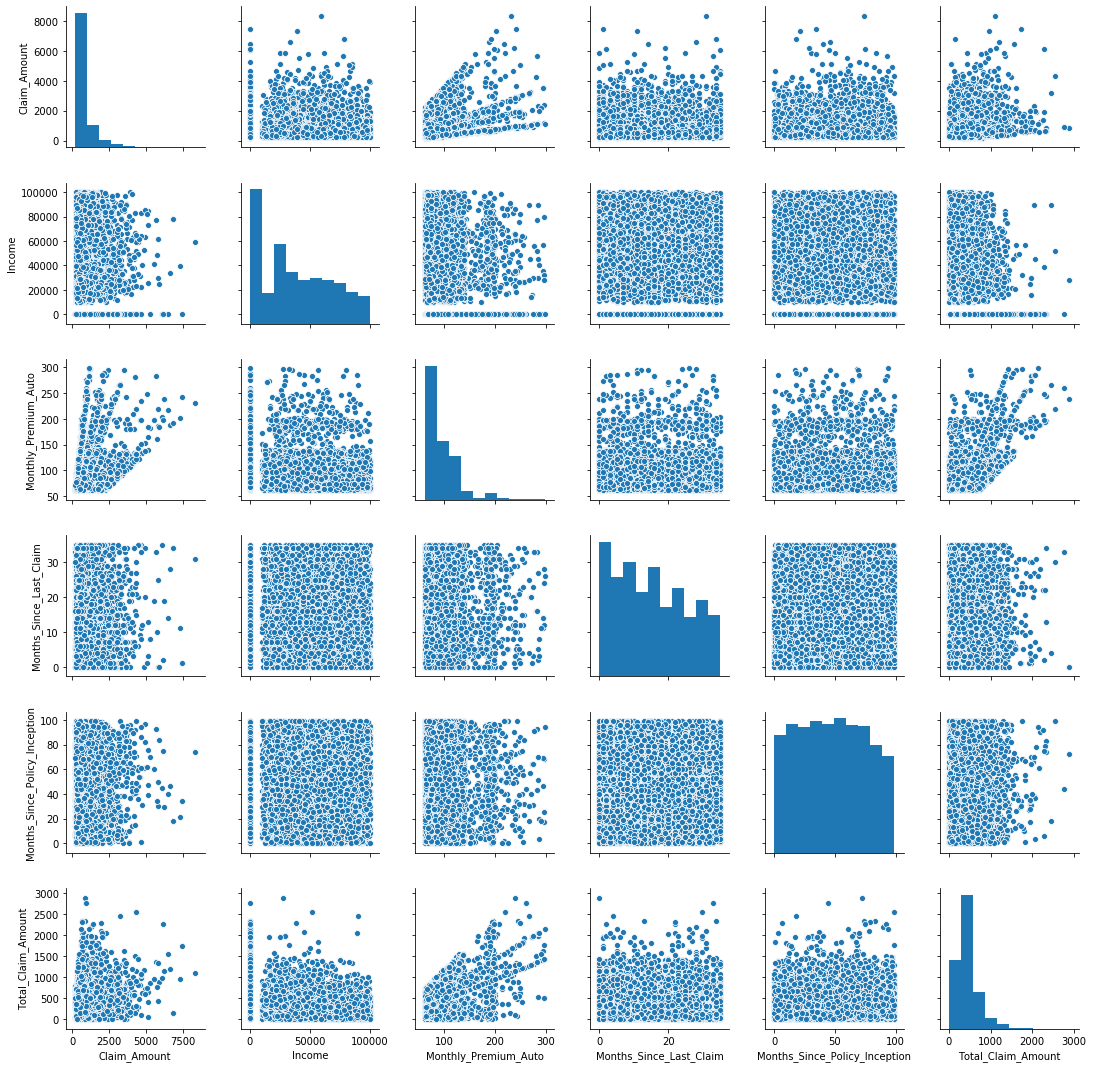

In [75]:
sns.pairplot(data=claim, vars=['Claim_Amount','Income','Monthly_Premium_Auto','Months_Since_Last_Claim','Months_Since_Policy_Inception','Total_Claim_Amount'])

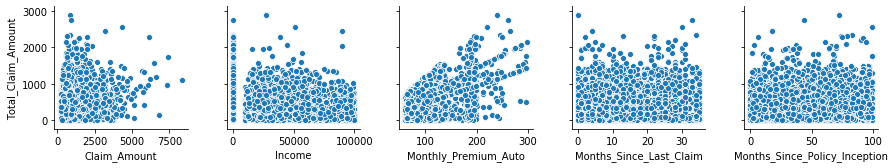

In [76]:
sns.pairplot(data=claim, x_vars=['Claim_Amount','Income','Monthly_Premium_Auto','Months_Since_Last_Claim','Months_Since_Policy_Inception'],y_vars=['Total_Claim_Amount'])

In [77]:
# cat_variables: Number_of_Open_Complaints,Number_of_Policies,Country,State_Code,State,Response,Coverage,Education,
#                Effective_To_Date,EmploymentStatus,Gender,Location_Code,Marital_Status,Policy_Type,Policy,Claim_Reason,
#                Sales_Channel,Vehicle_Class,Vehicle_Size

In [78]:
claim.groupby('State_Code').mean()[['Total_Claim_Amount','Claim_Amount','Income','Months_Since_Last_Claim']]

,Total_Claim_Amount,Claim_Amount,Income,Months_Since_Last_Claim
State_Code,,,,
IA,433.012542,807.790119,37557.283353,14.891196
KS,436.343596,802.147227,38122.733083,15.562657
MO,437.819268,800.364776,37558.946667,15.082540
NE,425.361446,786.134149,37405.402231,15.097475
OK,438.750566,805.670684,38369.605442,15.333333


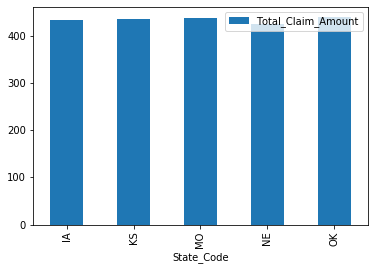

In [79]:
claim.groupby('State_Code').mean()[['Total_Claim_Amount']].plot.bar()

In [80]:
claim.groupby('Response').mean()[['Total_Claim_Amount','Claim_Amount','Income','Months_Since_Last_Claim']]

,Total_Claim_Amount,Claim_Amount,Income,Months_Since_Last_Claim
Response,,,,
No,432.084497,803.002230,37509.190008,15.165346
Yes,446.080868,785.487136,38544.027523,14.688073


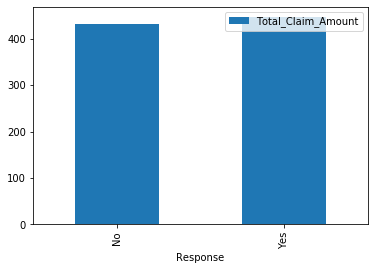

In [81]:
claim.groupby('Response').mean()[['Total_Claim_Amount']].plot.bar()

In [82]:
claim.groupby('Coverage').mean()[['Total_Claim_Amount','Claim_Amount','Income','Months_Since_Last_Claim']]

,Total_Claim_Amount,Claim_Amount,Income,Months_Since_Last_Claim
Coverage,,,,
Basic,379.036312,719.070642,38145.834770,14.974677
Extended,480.578885,878.967761,36380.099927,15.221371
Premium,651.390241,1089.560308,38607.120146,15.509709


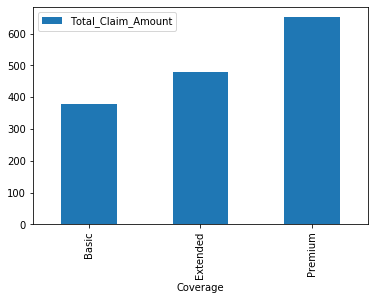

In [83]:
claim.groupby('Coverage').mean()[['Total_Claim_Amount']].plot.bar()

In [84]:
claim.groupby('Education').mean()[['Total_Claim_Amount','Claim_Amount','Income','Months_Since_Last_Claim']]

,Total_Claim_Amount,Claim_Amount,Income,Months_Since_Last_Claim
Education,,,,
Bachelor,427.993988,787.266041,37426.814774,14.834789
College,423.812895,785.106464,37357.165983,15.432301
Doctor,338.186584,752.034484,42353.128655,15.260234
High School or Below,487.189739,829.670903,35583.929443,14.978642
Master,350.237366,824.348469,44768.187584,15.199730


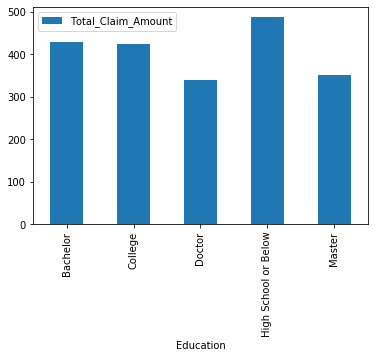

In [85]:
claim.groupby('Education').mean()[['Total_Claim_Amount']].plot.bar()

In [86]:
claim.groupby('EmploymentStatus').mean()[['Total_Claim_Amount','Claim_Amount','Income','Months_Since_Last_Claim']]

,Total_Claim_Amount,Claim_Amount,Income,Months_Since_Last_Claim
EmploymentStatus,,,,
Disabled,474.711480,784.788935,20045.582716,14.893827
Employed,358.275705,821.911775,56384.884521,15.032994
Medical Leave,471.933903,764.182244,20292.770833,15.793981
Retired,489.901069,748.786514,20554.960993,14.404255
Unemployed,599.579795,763.631976,0.000000,15.244281


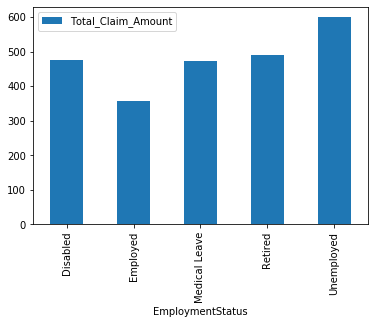

In [87]:
claim.groupby('EmploymentStatus').mean()[['Total_Claim_Amount']].plot.bar()

In [88]:
claim.groupby('Gender').mean()[['Total_Claim_Amount','Claim_Amount','Income','Months_Since_Last_Claim']]

,Total_Claim_Amount,Claim_Amount,Income,Months_Since_Last_Claim
Gender,,,,
F,412.856483,809.660237,38108.176471,14.844998
M,456.184439,790.955149,37188.253575,15.359249


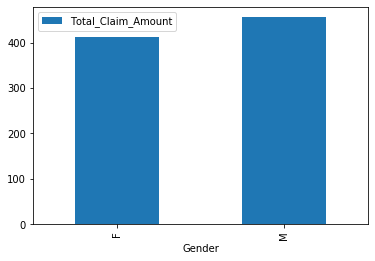

In [89]:
claim.groupby('Gender').mean()[['Total_Claim_Amount']].plot.bar()

In [90]:
claim.groupby('Location_Code').mean()[['Total_Claim_Amount','Claim_Amount','Income','Months_Since_Last_Claim']]

,Total_Claim_Amount,Claim_Amount,Income,Months_Since_Last_Claim
Location_Code,,,,
Rural,109.905095,795.369916,56002.503102,15.445572
Suburban,562.159870,800.445741,27201.051912,15.044471
Urban,329.572329,806.413293,55294.053097,14.898230


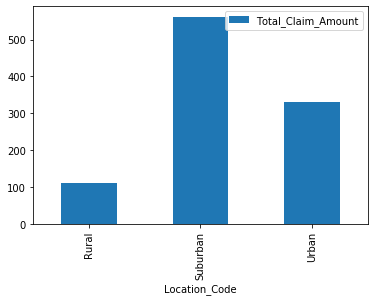

In [91]:
claim.groupby('Location_Code').mean()[['Total_Claim_Amount']].plot.bar()

In [92]:
claim.groupby('Marital_Status').mean()[['Total_Claim_Amount','Claim_Amount','Income','Months_Since_Last_Claim']]

,Total_Claim_Amount,Claim_Amount,Income,Months_Since_Last_Claim
Marital_Status,,,,
Divorced,403.704718,824.123913,40694.592403,14.711468
Married,384.517033,807.896697,43814.424877,15.210457
Single,557.407396,771.483702,22749.407783,15.067288


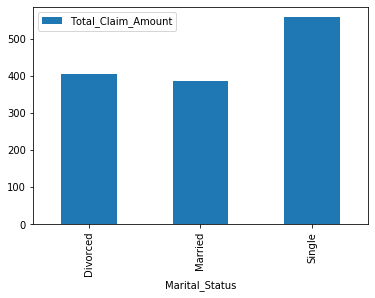

In [93]:
claim.groupby('Marital_Status').mean()[['Total_Claim_Amount']].plot.bar()

In [94]:
claim.groupby('Policy_Type').mean()[['Total_Claim_Amount','Claim_Amount','Income','Months_Since_Last_Claim']]

,Total_Claim_Amount,Claim_Amount,Income,Months_Since_Last_Claim
Policy_Type,,,,
Corporate Auto,430.312188,781.440955,37782.615854,15.422256
Personal Auto,434.828219,802.736353,37544.292722,15.020035
Special Auto,440.472770,859.424504,39036.142857,14.785714


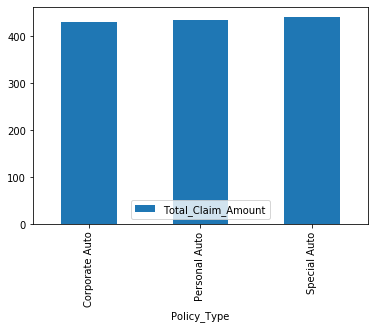

In [95]:
claim.groupby('Policy_Type').mean()[['Total_Claim_Amount']].plot.bar()

In [96]:
claim.groupby('Claim_Reason').mean()[['Total_Claim_Amount','Claim_Amount','Income','Months_Since_Last_Claim']]

,Total_Claim_Amount,Claim_Amount,Income,Months_Since_Last_Claim
Claim_Reason,,,,
Collision,469.165640,870.708558,30764.733209,15.197495
Hail,408.778268,739.675383,44014.951128,15.219070
Other,392.847065,717.994727,43495.460938,14.703125
Scratch/Dent,423.391734,799.788652,38551.767458,14.865922


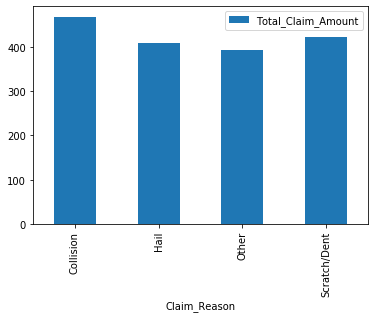

In [97]:
claim.groupby('Claim_Reason').mean()[['Total_Claim_Amount']].plot.bar()

In [98]:
claim.groupby('Sales_Channel').mean()[['Total_Claim_Amount','Claim_Amount','Income','Months_Since_Last_Claim']]

,Total_Claim_Amount,Claim_Amount,Income,Months_Since_Last_Claim
Sales_Channel,,,,
Agent,438.434673,795.770935,37179.949382,14.943342
Branch,432.866800,811.971186,37583.601091,15.225166
Call Center,428.124624,810.008575,38424.933144,15.385269
Web,432.996719,777.978806,38030.727547,14.867925


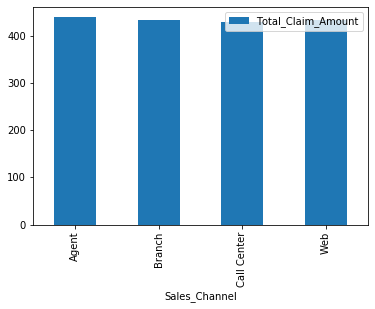

In [99]:
claim.groupby('Sales_Channel').mean()[['Total_Claim_Amount']].plot.bar()

In [100]:
claim.groupby('Vehicle_Class').mean()[['Total_Claim_Amount','Claim_Amount','Income','Months_Since_Last_Claim']]

,Total_Claim_Amount,Claim_Amount,Income,Months_Since_Last_Claim
Vehicle_Class,,,,
Four-Door Car,351.760366,663.172661,37798.692491,15.156460
Luxury Car,1130.288964,1705.334840,38807.153374,15.478528
Luxury SUV,1092.525076,1712.299913,35598.021739,15.277174
SUV,569.572999,1044.351182,36460.525056,14.704900
Sports Car,558.148000,1075.098933,35432.574380,15.121901
Two-Door Car,350.542917,667.103073,39123.372216,15.267762


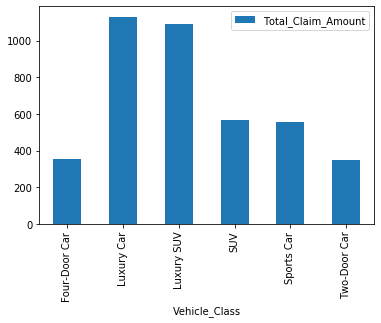

In [101]:
claim.groupby('Vehicle_Class').mean()[['Total_Claim_Amount']].plot.bar()

In [103]:
# cat_variables: Number_of_Open_Complaints,Number_of_Policies,Country,State_Code,State,Response,Coverage,Education,
#                Effective_To_Date,EmploymentStatus,Gender,Location_Code,Marital_Status,Policy_Type,Policy,Claim_Reason,
#                Sales_Channel,Vehicle_Class,Vehicle_Size

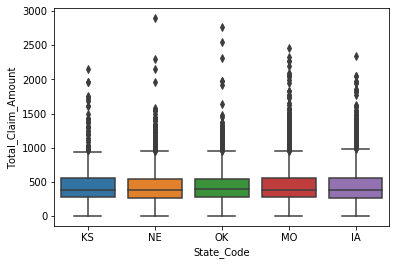

In [106]:
sns.boxplot(data=claim,x='State_Code',y='Total_Claim_Amount')

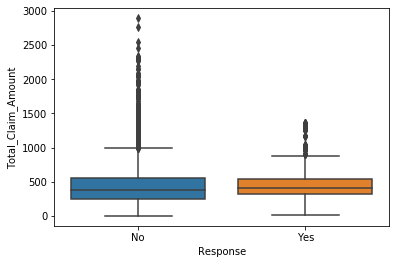

In [107]:
sns.boxplot(data=claim,x='Response',y='Total_Claim_Amount')

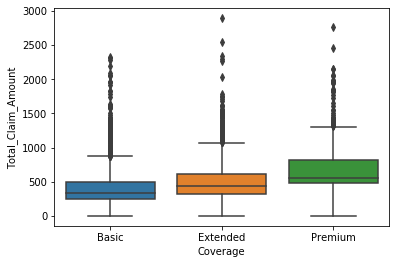

In [108]:
sns.boxplot(data=claim,x='Coverage',y='Total_Claim_Amount')

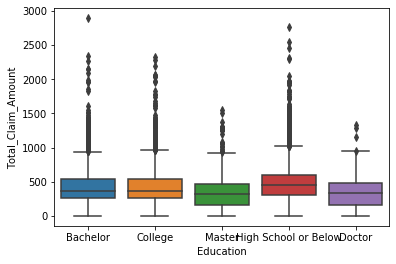

In [109]:
sns.boxplot(data=claim,x='Education',y='Total_Claim_Amount')

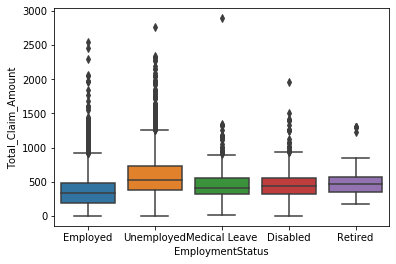

In [110]:
sns.boxplot(data=claim,x='EmploymentStatus',y='Total_Claim_Amount')

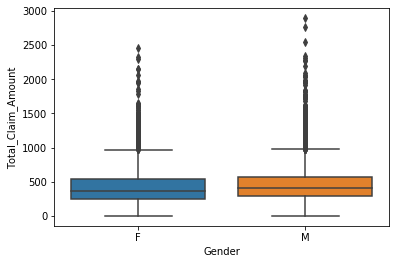

In [111]:
sns.boxplot(data=claim,x='Gender',y='Total_Claim_Amount')

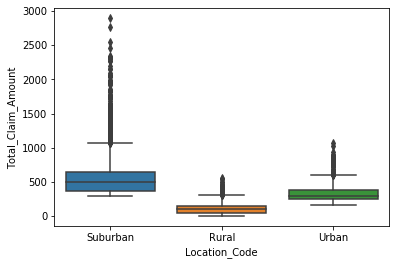

In [112]:
sns.boxplot(data=claim,x='Location_Code',y='Total_Claim_Amount')

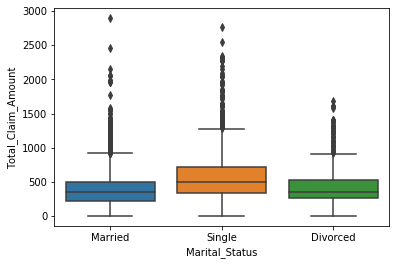

In [113]:
sns.boxplot(data=claim,x='Marital_Status',y='Total_Claim_Amount')

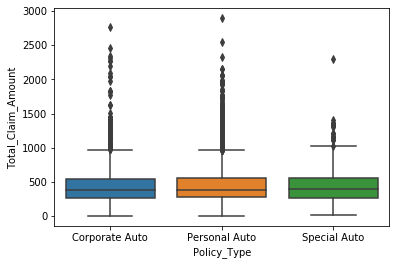

In [114]:
sns.boxplot(data=claim,x='Policy_Type',y='Total_Claim_Amount')

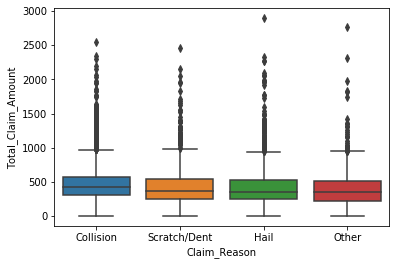

In [115]:
sns.boxplot(data=claim,x='Claim_Reason',y='Total_Claim_Amount')

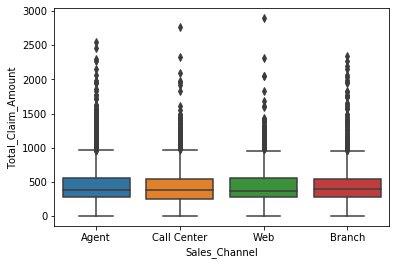

In [116]:
sns.boxplot(data=claim,x='Sales_Channel',y='Total_Claim_Amount')

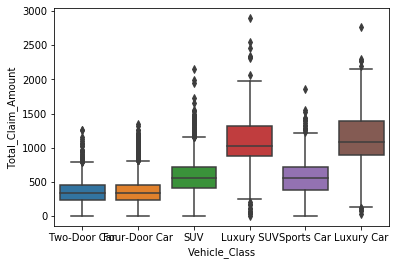

In [117]:
sns.boxplot(data=claim,x='Vehicle_Class',y='Total_Claim_Amount')

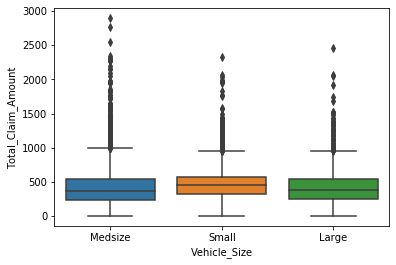

In [118]:
sns.boxplot(data=claim,x='Vehicle_Size',y='Total_Claim_Amount')

# Distribution and Corr

In [119]:
# lets drop the unneccessary features and encode categorical features

In [120]:
claim.drop(['State','Country'],axis=1,inplace=True)

In [121]:
claim.head(1)

,State_Code,Claim_Amount,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,Gender,Income,Location_Code,Marital_Status,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Claim_Reason,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
0,KS,276.351928,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize


In [122]:
from sklearn.preprocessing import LabelEncoder
def le(df,col):
    lab=LabelEncoder()
    df[col]=pd.Series(lab.fit_transform(df[col]))

In [123]:
claim.dtypes

State_Code                        object
Claim_Amount                     float64
Response                          object
Coverage                          object
Education                         object
Effective_To_Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location_Code                     object
Marital_Status                    object
Monthly_Premium_Auto               int64
Months_Since_Last_Claim            int64
Months_Since_Policy_Inception      int64
Number_of_Open_Complaints          int64
Number_of_Policies                 int64
Policy_Type                       object
Policy                            object
Claim_Reason                      object
Sales_Channel                     object
Total_Claim_Amount               float64
Vehicle_Class                     object
Vehicle_Size                      object
dtype: object

In [126]:
le(claim,'State_Code')
le(claim,'Response')
le(claim,'Coverage')
le(claim,'Education')
le(claim,'Effective_To_Date')
le(claim,'EmploymentStatus')
le(claim,'Gender')
le(claim,'Location_Code')
le(claim,'Marital_Status')
le(claim,'Policy_Type')
le(claim,'Policy')
le(claim,'Claim_Reason')
le(claim,'Sales_Channel')
le(claim,'Vehicle_Class')
le(claim,'Vehicle_Size')

In [127]:
claim.head(20)

,State_Code,Claim_Amount,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,Gender,Income,Location_Code,Marital_Status,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Claim_Reason,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
0,1,276.351928,0,0,0,47,1,0,56274,1,1,69,32,5,0,1,0,2,0,0,384.811147,5,1
1,3,697.953590,0,1,0,24,4,0,0,1,2,94,13,42,0,8,1,5,3,0,1131.464935,0,1
2,4,1288.743165,0,2,0,41,1,0,48767,1,1,108,18,38,0,2,1,5,0,0,566.472247,5,1
3,2,764.586183,0,0,0,12,4,1,0,1,1,106,18,65,0,7,0,1,0,2,529.881344,3,1
4,1,281.369258,0,0,0,52,1,1,43836,0,2,73,12,44,0,1,1,3,0,0,138.130879,0,1
5,0,825.629780,1,0,0,17,1,0,62902,0,1,69,14,94,0,2,1,5,1,3,159.383042,5,1
6,0,538.089864,1,0,1,47,1,0,55350,1,1,67,0,13,0,9,0,2,0,0,321.600000,0,1
7,3,721.610031,0,2,4,9,4,1,0,2,2,101,0,68,0,4,0,2,0,0,363.029680,0,1
8,0,2412.750402,1,0,0,18,2,1,14072,1,0,71,13,3,0,2,0,2,0,0,511.200000,0,1
9,0,738.817808,0,1,1,39,1,0,28812,2,1,93,17,7,0,8,2,7,1,1,425.527834,0,1


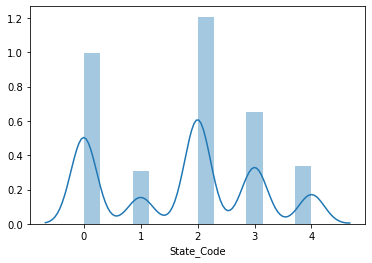

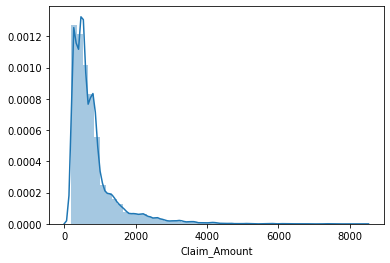

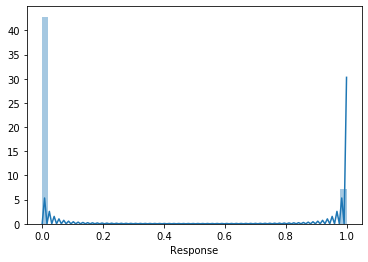

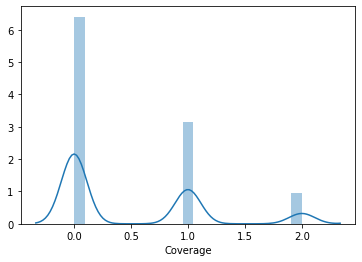

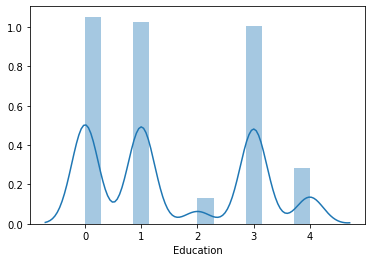

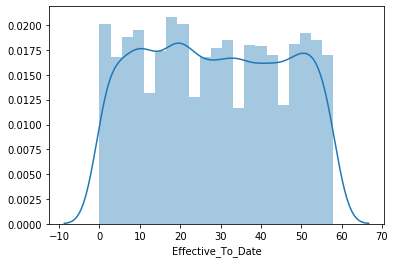

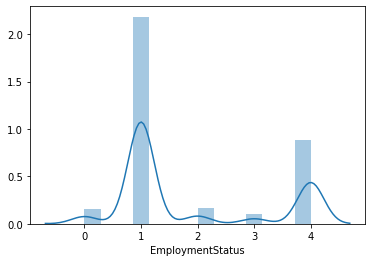

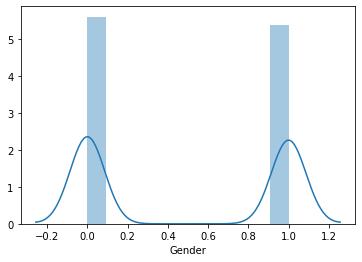

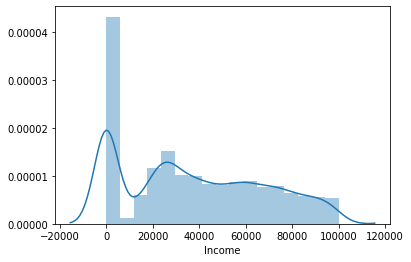

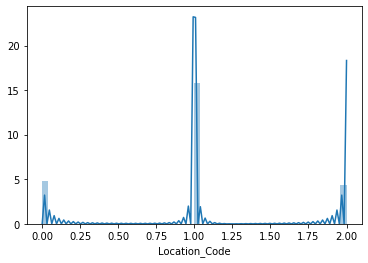

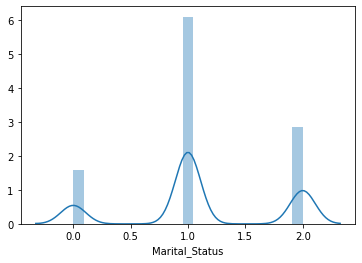

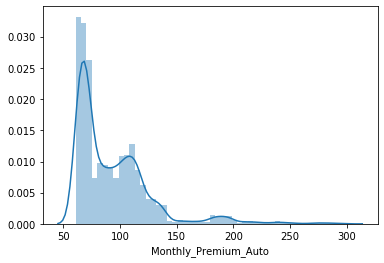

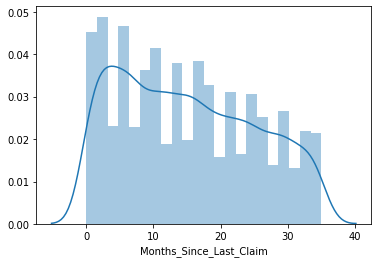

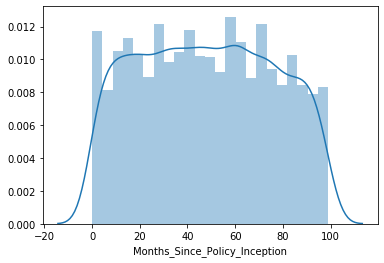

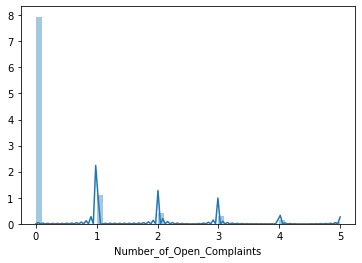

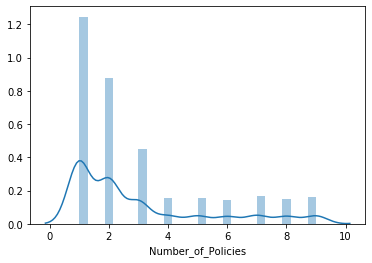

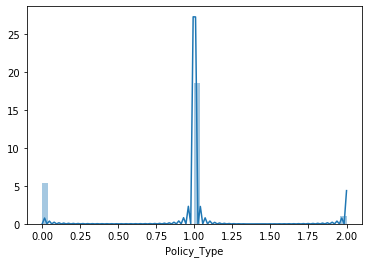

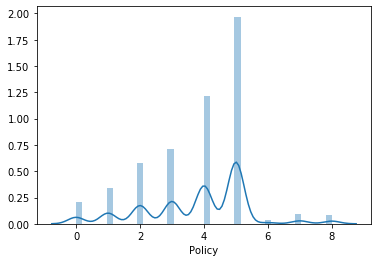

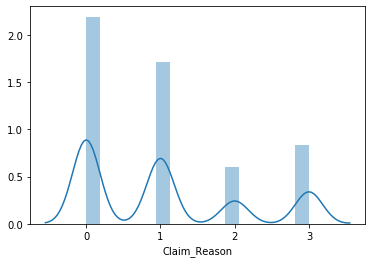

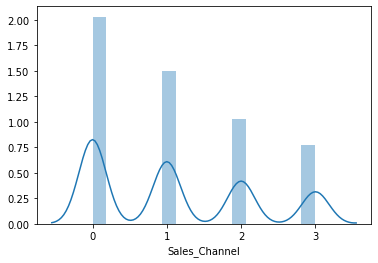

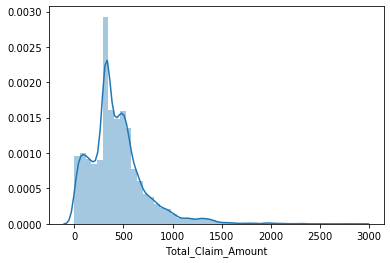

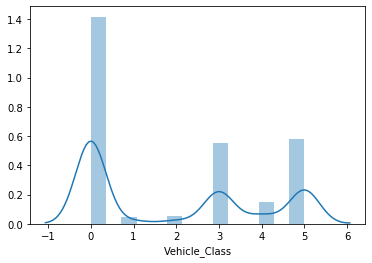

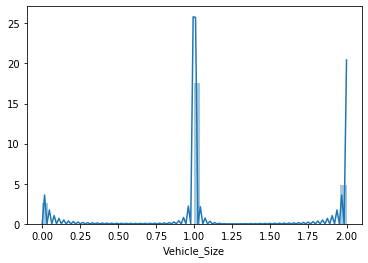

In [128]:
cols=claim.columns.values
# Distplot
for i in cols:
    plt.subplots()
    sns.distplot(claim[i])

In [129]:
claim.skew()

State_Code                       0.021065
Claim_Amount                     3.032280
Response                         2.037567
Coverage                         1.031310
Education                        0.333148
Effective_To_Date                0.033899
EmploymentStatus                 0.832147
Gender                           0.039866
Income                           0.286887
Location_Code                    0.009511
Marital_Status                  -0.107553
Monthly_Premium_Auto             2.123546
Months_Since_Last_Claim          0.278586
Months_Since_Policy_Inception    0.040165
Number_of_Open_Complaints        2.783263
Number_of_Policies               1.253333
Policy_Type                     -0.468383
Policy                          -0.427639
Claim_Reason                     0.733526
Sales_Channel                    0.506774
Total_Claim_Amount               1.714966
Vehicle_Class                    0.395146
Vehicle_Size                     0.072742
dtype: float64

In [130]:
# Claim_Amount,Monthly_Premium_Auto,Total_Claim_Amount

# Response,Coverage,EmploymentStatus,Number_of_Open_Complaints,Number_of_Policies,Claim_Reason

In [131]:
claim.corr()

,State_Code,Claim_Amount,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,Gender,Income,Location_Code,Marital_Status,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Claim_Reason,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
State_Code,1.000000,-0.006629,-0.001732,0.007558,0.004256,-0.000448,-0.004054,0.000545,0.002682,0.001382,-0.008975,-0.005549,0.009249,-0.004459,0.014814,-0.005993,-0.009102,-0.014193,0.001845,0.002662,-0.000816,-0.004813,-0.000956
Claim_Amount,-0.006629,1.000000,-0.008930,0.168040,0.026038,-0.012978,-0.034846,-0.013610,0.024366,0.004854,-0.026003,0.396262,0.011517,0.009418,-0.036343,0.021955,0.020011,0.015217,-0.052004,-0.003941,0.226451,0.082307,0.017098
Response,-0.001732,-0.008930,1.000000,0.000642,0.000285,-0.043133,-0.016703,0.004396,0.011932,0.001729,-0.094843,0.010966,-0.016597,0.002952,-0.009881,-0.020891,0.001110,-0.001461,-0.161332,-0.086607,0.016877,0.021225,-0.050691
Coverage,0.007558,0.168040,0.000642,1.000000,0.021573,0.005482,0.003239,-0.014448,-0.010646,-0.020176,0.002956,0.458997,0.016925,0.010658,-0.007971,-0.013515,0.001469,-0.002317,-0.041627,-0.024638,0.279078,-0.017682,-0.003775
Education,0.004256,0.026038,0.000285,0.021573,1.000000,0.001276,-0.025271,0.002206,0.018709,-0.011533,0.005675,0.023952,0.003021,0.004140,-0.023270,0.007266,0.011650,0.011119,0.049994,-0.005018,0.020730,0.010192,-0.005491
Effective_To_Date,-0.000448,-0.012978,-0.043133,0.005482,0.001276,1.000000,-0.002569,-0.013322,-0.000531,-0.001960,-0.014265,0.004844,-0.003912,0.008281,-0.008880,0.006946,-0.007466,-0.006625,0.005622,-0.010888,0.000806,-0.019002,0.005368
EmploymentStatus,-0.004054,-0.034846,-0.016703,0.003239,-0.025271,-0.002569,1.000000,0.034960,-0.726741,0.015921,0.311563,0.006269,0.008197,0.015376,0.007045,0.005035,-0.002240,-0.001159,-0.100479,-0.018346,0.330465,-0.002443,-0.011253
Gender,0.000545,-0.013610,0.004396,-0.014448,0.002206,-0.013322,0.034960,1.000000,-0.015138,0.003108,0.034027,0.003918,0.025522,0.004198,-0.003012,0.016258,-0.002227,-0.003123,0.031730,-0.020614,0.074564,0.020043,-0.000347
Income,0.002682,0.024366,0.011932,-0.010646,0.018709,-0.000531,-0.726741,-0.015138,1.000000,-0.027517,-0.231673,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,0.002080,0.005032,0.115622,0.013494,-0.355254,0.004343,0.007945
Location_Code,0.001382,0.004854,0.001729,-0.020176,-0.011533,-0.001960,0.015921,0.003108,-0.027517,1.000000,0.016452,0.002631,-0.016733,0.007030,-0.002697,0.003066,0.015096,0.012086,-0.010815,-0.003953,0.254766,0.001870,0.021230


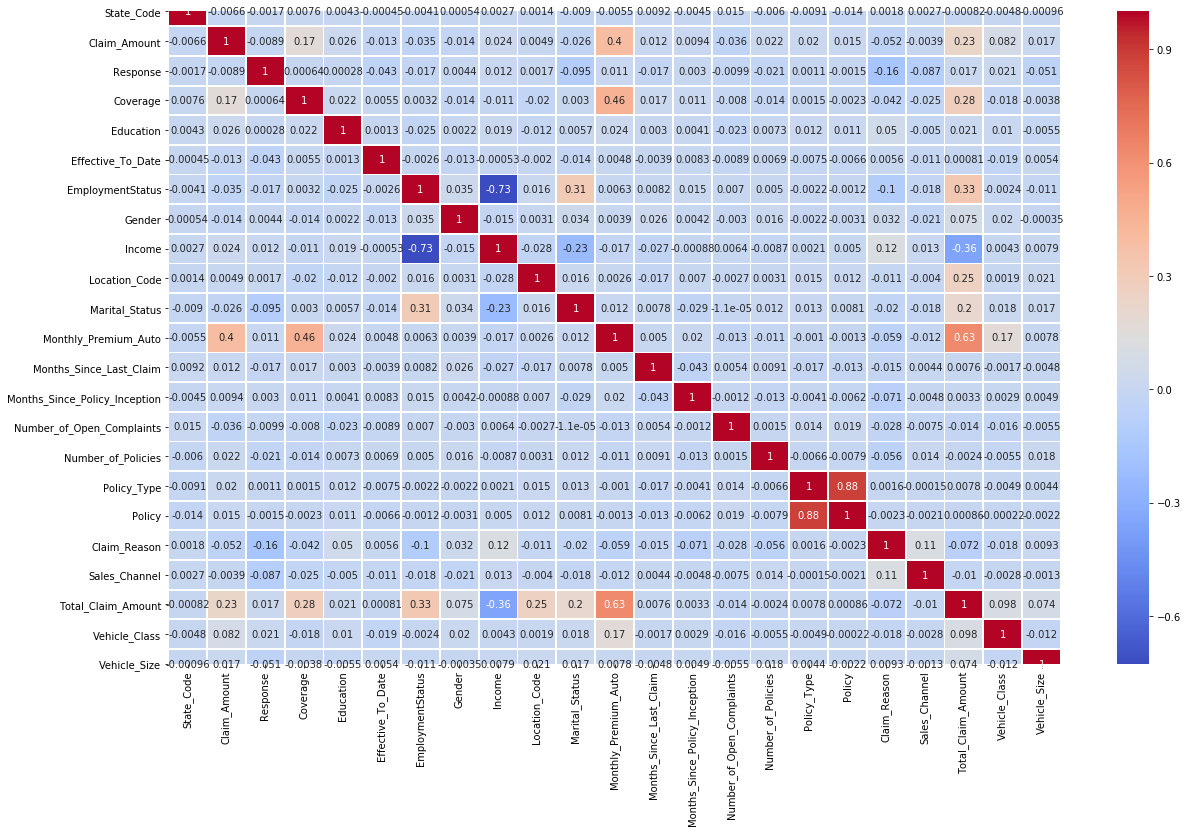

In [133]:
plt.figure(figsize=(20,12))
sns.heatmap(claim.corr(),annot=True,cmap='coolwarm',linewidths=0.8)

In [134]:
# +ve corr: in policy and policy_type

# -ve corr: Income and EmploymentStatus

# Outliers

In [135]:
# boxplots

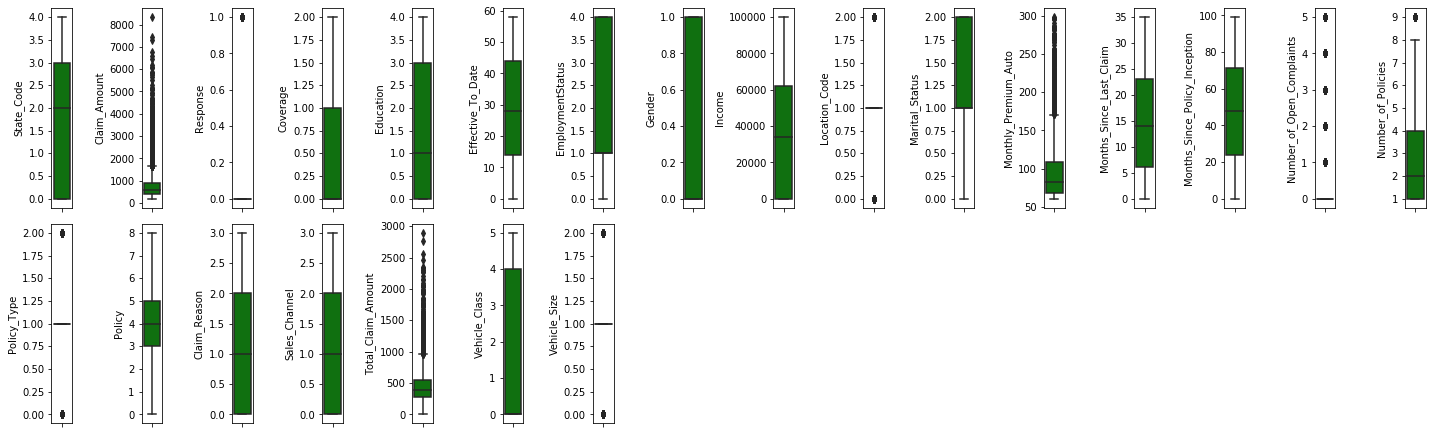

In [136]:
plt.figure(figsize=(20,60))
for i in range(len(cols)):
    plt.subplot(20,16,i+1)
    sns.boxplot(claim[cols[i]], color='green', orient='v')
    plt.tight_layout()

In [137]:
# claim_amount, monthly_premium_auto, total_claim_amount

In [139]:
# using IQR method
# using IQR method
def outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_out=(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
    return(df_out.sum())

def lower(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower=Q1 - 1.5 * IQR
    return lower

def upper(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper=Q3 + 1.5 * IQR
    return upper

def treat_outlier(df,col):
    for i in range(df.shape[0]):
        if (df[col].iloc[i])>upper(df,col):
            df[col].iloc[i]=upper(df,col)
        elif (df[col].iloc[i])<lower(df,col):
            df[col].iloc[i]=lower(df,col)
            
def remove_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return (df.shape)

In [140]:
outlier(claim)

State_Code                          0
Claim_Amount                      817
Response                         1308
Coverage                            0
Education                           0
Effective_To_Date                   0
EmploymentStatus                    0
Gender                              0
Income                              0
Location_Code                    3355
Marital_Status                      0
Monthly_Premium_Auto              430
Months_Since_Last_Claim             0
Months_Since_Policy_Inception       0
Number_of_Open_Complaints        1882
Number_of_Policies                416
Policy_Type                      2346
Policy                              0
Claim_Reason                        0
Sales_Channel                       0
Total_Claim_Amount                453
Vehicle_Class                       0
Vehicle_Size                     2710
dtype: int64

In [141]:
from scipy.stats import zscore
z=np.abs(zscore(claim))
len(np.where(z>3)[0])

774

In [142]:
# there are 774 outliers acc to zscore method
claimz=claim.copy()

In [143]:
claimz=claimz[(z<3).all(axis=1)]
claimz.shape

(8470, 23)

In [144]:
# lets treat outliers using IQR method
treat_outlier(claim,'Claim_Amount')
treat_outlier(claim,'Monthly_Premium_Auto')
treat_outlier(claim,'Total_Claim_Amount')

In [145]:
outlier(claim)

State_Code                          0
Claim_Amount                        0
Response                         1308
Coverage                            0
Education                           0
Effective_To_Date                   0
EmploymentStatus                    0
Gender                              0
Income                              0
Location_Code                    3355
Marital_Status                      0
Monthly_Premium_Auto                0
Months_Since_Last_Claim             0
Months_Since_Policy_Inception       0
Number_of_Open_Complaints        1882
Number_of_Policies                416
Policy_Type                      2346
Policy                              0
Claim_Reason                        0
Sales_Channel                       0
Total_Claim_Amount                  0
Vehicle_Class                       0
Vehicle_Size                     2710
dtype: int64

# Definitions

In [146]:
# this is a regression problem

In [147]:
# lets seperate x and y first

In [175]:
x=claim.drop('Total_Claim_Amount',axis=1)
y=claim['Total_Claim_Amount']

In [176]:
xz=claim.drop('Total_Claim_Amount',axis=1)
yz=claim['Total_Claim_Amount']

In [152]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score,cross_val_predict,cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [238]:
# Now, let's define some functions to reuse them
def fit(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs)
    m.fit(x_train,y_train)
    
def get_score(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs)
    m.fit(x_train,y_train)
    train_score=m.score(x_train,y_train)
    pred=m.predict(x_test)
    test_score=r2_score(pred,y_test)
    rmse=np.sqrt(mean_squared_error(pred,y_test))
    return train_score,test_score,rmse

def get_pred(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    return pred

def get_metrics(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    mse=mean_squared_error(pred,y_test)
    mae=mean_absolute_error(pred,y_test)
    rmse=np.sqrt(mean_squared_error(pred,y_test))
    return mse,rmse,mae

from sklearn.model_selection import GridSearchCV
def gridcv(m,p,x,y):
    gkb=GridSearchCV(m,p,n_jobs=-1,cv=4,verbose=5,scoring='neg_mean_squared_error')
    gkb.fit(x,y)
    return gkb.best_params_


from sklearn.model_selection import RandomizedSearchCV
def randomcv(m,p,x,y):
    from sklearn.model_selection import RandomizedSearchCV
    gkb=RandomizedSearchCV(estimator=m,param_distributions=p,
                          cv=4,n_iter=100,scoring='neg_mean_squared_error',
                          n_jobs=-1, verbose=5,return_train_score=True,random_state=45)
    gkb.fit(x,y)
    return gkb.best_params_

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
def bfe(m,x,y,k):
    sf=sfs(m, k_features=k, forward=False, verbose=3, cv=5, n_jobs=-1)
    sf.fit(x,y)
    feat_names=list(sf.k_feature_names_)
    xbfe=x[feat_names]
    return xbfe

def ffs(m,x,y,k):
    sf=sfs(m, k_features=k, forward=True, cv=5, n_jobs=-1)
    sf.fit(x,y)
    feat_names=list(sf.k_feature_names_)
    xffs=x[feat_names]
    return xffs

from sklearn.decomposition import PCA
def nforpca(x):
    pca=PCA().fit(x)
    plt.figure()
    plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
    plt.xlabel('No of Components')
    plt.ylabel('Variance')
    plt.axhline(y=95, color='r', linestyle='--')
    plt.show()
    
def pca(m,x,n):
    pca=PCA(n_components=n)
    xpca=pd.DataFrame(pca.fit_transform(x))
    return xpca


def cross(m,x,y,c=5):
    score=cross_val_score(m,x,y,cv=c,n_jobs=-1,scoring='r2')
    return (score.mean(), score.std())

from sklearn.preprocessing import StandardScaler
def std(x):
    scx=StandardScaler()
    xs=pd.DataFrame(scx.fit_transform(x), columns=x.columns)
    return xs

from sklearn.preprocessing import MinMaxScaler
def mmc(x):
    mm=MinMaxScaler()
    xm=pd.DataFrame(mm.fit_transform(x), columns=x.columns)
    return xm

def modified_bfe(m,x,y,k):
    sf=sfs(m, k_features=k, forward=False, cv=5, n_jobs=-1)
    sf.fit(x,y)
    feat_names=list(sf.k_feature_names_)
    xbfe=x[feat_names]
    x_train, x_test, y_train, y_test=train_test_split(xbfe,y,test_size=0.25,random_state=45)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    test_score=r2_score(pred,y_test)
    return test_score

def modified_ffs(m,x,y,k):
    sf=sfs(m, k_features=k, forward=True, cv=5, n_jobs=-1)
    sf.fit(x,y)
    feat_names=list(sf.k_feature_names_)
    xffs=x[feat_names]
    x_train, x_test, y_train, y_test=train_test_split(xffs,y,test_size=0.25,random_state=45)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    test_score=r2_score(pred,y_test)
    return test_score

def modified_pca(m,x,y,n):
    pca=PCA(n_components=n)
    xpca=pd.DataFrame(pca.fit_transform(x))
    x_train, x_test, y_train, y_test=train_test_split(xpca,y,test_size=0.25,random_state=45)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    test_score=r2_score(pred,y_test)
    return test_score

def tts(x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs)
    return x_train, x_test, y_train, y_test

In [154]:
lr=LinearRegression(n_jobs=-1)
dt=DecisionTreeRegressor(random_state=45)
svr=SVR()
knn=KNeighborsRegressor(n_jobs=-1)
rid=Ridge(random_state=45)
ls=Lasso(random_state=45)
rf=RandomForestRegressor(n_jobs=-1,random_state=45)
gb=GradientBoostingRegressor(random_state=45)
xgb=XGBRegressor(n_jobs=-1,random_state=45)
ada=AdaBoostRegressor(random_state=45)

# Iteration A

In [155]:
print("LR ", get_score(lr,x,y))
print("DT ", get_score(dt,x,y))
print("SVR ", get_score(svr,x,y))
print("KNN ", get_score(knn,x,y))
print("RID ", get_score(rid,x,y))
print("LS ", get_score(ls,x,y))
print("RF ", get_score(rf,x,y))
print("XGB ", get_score(xgb,x,y))
print("GB ", get_score(gb,x,y))

LR  (0.5881845939671407, 0.2964818744602604, 156.42312474283622)
DT  (1.0, 0.7709302974998298, 118.53410755352401)
SVR  (-0.013188092588560574, -52904.060691855266, 245.06541377064437)
KNN  (0.5233719110317124, -0.42897011628631776, 206.85542112138864)
RID  (0.5881845697279822, 0.29636770152678704, 156.42306979109927)
LS  (0.5874551109211285, 0.28506125653530623, 156.34987447475697)
RF  (0.9730330594024929, 0.8421005828618832, 92.20507031407543)
XGB  (0.9720815188198897, 0.843721806734449, 91.49552914813643)
GB  (0.8705955476137749, 0.8387367381119519, 89.71973949197351)


# Iteration B

In [156]:
print("LR ", get_score(lr,xz,yz))
print("DT ", get_score(dt,xz,yz))
print("SVR ", get_score(svr,xz,yz))
print("KNN ", get_score(knn,xz,yz))
print("RID ", get_score(rid,xz,yz))
print("LS ", get_score(ls,xz,yz))
print("RF ", get_score(rf,xz,yz))
print("XGB ", get_score(xgb,xz,yz))
print("GB ", get_score(gb,xz,yz))

LR  (0.5881845939671407, 0.2964818744602604, 156.42312474283622)
DT  (1.0, 0.7709302974998298, 118.53410755352401)
SVR  (-0.013188092588560574, -52904.060691855266, 245.06541377064437)
KNN  (0.5233719110317124, -0.42897011628631776, 206.85542112138864)
RID  (0.5881845697279822, 0.29636770152678704, 156.42306979109927)
LS  (0.5874551109211285, 0.28506125653530623, 156.34987447475697)
RF  (0.9730330594024929, 0.8421005828618832, 92.20507031407543)
XGB  (0.9720815188198897, 0.843721806734449, 91.49552914813643)
GB  (0.8705955476137749, 0.8387367381119519, 89.71973949197351)


In [157]:
# there is no change in results
# we'll go with x and y

# Iteration C

In [158]:
# lets apply some binning

In [159]:
# Vehicle_Class, Policy, EmploymentStatus, Number_of_Open_Complaints

In [177]:
x1=x.copy()

In [178]:
x1['Vehicle_Class'].value_counts()

0    4621
5    1886
3    1796
4     484
2     184
1     163
Name: Vehicle_Class, dtype: int64

In [179]:
for i in range(len(x)):
    if x1['Vehicle_Class'].iloc[i]==1 or x1['Vehicle_Class'].iloc[i]==2:
        x1['Vehicle_Class'].iloc[i]=4

In [181]:
x1['Vehicle_Class'].value_counts()

0    4621
5    1886
3    1796
4     831
Name: Vehicle_Class, dtype: int64

In [182]:
x1['Policy'].value_counts()

5    3426
4    2122
3    1240
2    1014
1     595
0     359
7     164
8     148
6      66
Name: Policy, dtype: int64

In [183]:
for i in range(len(x)):
    if x1['Policy'].iloc[i]==7 or x1['Policy'].iloc[i]==8:
        x1['Policy'].iloc[i]=6

In [185]:
x1['Policy'].value_counts()

5    3426
4    2122
3    1240
2    1014
1     595
6     378
0     359
Name: Policy, dtype: int64

In [166]:
x['EmploymentStatus'].value_counts()

1    5698
4    2317
2     432
0     405
3     282
Name: EmploymentStatus, dtype: int64

In [186]:
for i in range(len(x)):
    if x1['EmploymentStatus'].iloc[i]==3:
        x1['EmploymentStatus'].iloc[i]=0

In [188]:
x1['EmploymentStatus'].value_counts()

1    5698
4    2317
0     687
2     432
Name: EmploymentStatus, dtype: int64

In [189]:
x['Number_of_Open_Complaints'].value_counts()

0    7252
1    1011
2     374
3     292
4     149
5      56
Name: Number_of_Open_Complaints, dtype: int64

In [190]:
for i in range(len(x)):
    if x1['Number_of_Open_Complaints'].iloc[i]==3 or x1['Number_of_Open_Complaints'].iloc[i]==4 or x1['Number_of_Open_Complaints'].iloc[i]==5:
        x1['Number_of_Open_Complaints'].iloc[i]=2

In [192]:
x1['Number_of_Open_Complaints'].value_counts()

0    7252
1    1011
2     871
Name: Number_of_Open_Complaints, dtype: int64

In [193]:
print("LR ", get_score(lr,x1,y))
print("DT ", get_score(dt,x1,y))
print("SVR ", get_score(svr,x1,y))
print("KNN ", get_score(knn,x1,y))
print("RID ", get_score(rid,x1,y))
print("LS ", get_score(ls,x1,y))
print("RF ", get_score(rf,x1,y))
print("XGB ", get_score(xgb,x1,y))
print("GB ", get_score(gb,x1,y))

LR  (0.5865031581684981, 0.28636406570649986, 157.03044376550008)
DT  (1.0, 0.7571041627717854, 121.49301392152331)
SVR  (-0.013149322720934274, -51431.75227711375, 245.06074570779626)
KNN  (0.523605688110013, -0.42903185003028077, 206.87110677075702)
RID  (0.5865031324419898, 0.28624644819294875, 157.03023972698216)
LS  (0.5857696732569899, 0.27515929693390007, 156.92213196004033)
RF  (0.9736069595236843, 0.8408824599574258, 92.43561495598426)
XGB  (0.9714100408196183, 0.8453234822643628, 90.69279387172848)
GB  (0.8707096365610029, 0.838638532710924, 89.6134988072458)


In [194]:
# the score reduced

In [195]:
# we'll go with x and y only

# Iteration 1

In [196]:
print("LR ", get_score(lr,x,y))
print("DT ", get_score(dt,x,y))
print("SVR ", get_score(svr,x,y))
print("KNN ", get_score(knn,x,y))
print("RID ", get_score(rid,x,y))
print("LS ", get_score(ls,x,y))
print("RF ", get_score(rf,x,y))
print("XGB ", get_score(xgb,x,y))
print("GB ", get_score(gb,x,y))

LR  (0.5881845939671407, 0.2964818744602604, 156.42312474283622)
DT  (1.0, 0.7709302974998298, 118.53410755352401)
SVR  (-0.013188092588560574, -52904.060691855266, 245.06541377064437)
KNN  (0.5233719110317124, -0.42897011628631776, 206.85542112138864)
RID  (0.5881845697279822, 0.29636770152678704, 156.42306979109927)
LS  (0.5874551109211285, 0.28506125653530623, 156.34987447475697)
RF  (0.9730330594024929, 0.8421005828618832, 92.20507031407543)
XGB  (0.9720815188198897, 0.843721806734449, 91.49552914813643)
GB  (0.8705955476137749, 0.8387367381119519, 89.71973949197351)


# Iteration 2

In [197]:
# lets remove the skewness

In [198]:
x.skew()

State_Code                       0.021065
Claim_Amount                     0.966898
Response                         2.037567
Coverage                         1.031310
Education                        0.333148
Effective_To_Date                0.033899
EmploymentStatus                 0.832147
Gender                           0.039866
Income                           0.286887
Location_Code                    0.009511
Marital_Status                  -0.107553
Monthly_Premium_Auto             1.139909
Months_Since_Last_Claim          0.278586
Months_Since_Policy_Inception    0.040165
Number_of_Open_Complaints        2.783263
Number_of_Policies               1.253333
Policy_Type                     -0.468383
Policy                          -0.427639
Claim_Reason                     0.733526
Sales_Channel                    0.506774
Vehicle_Class                    0.395146
Vehicle_Size                     0.072742
dtype: float64

In [199]:
# Claim_Amount,Monthly_Premium_Auto

# Response,Coverage,EmploymentStatus,Number_of_Open_Complaints,Number_of_Policies,Claim_Reason

In [200]:
x_sk=x.copy()

In [203]:
x_sk['Claim_Amount'].min(), x_sk['Claim_Amount'].max()
x_sk['Claim_Amount']=np.log(x_sk['Claim_Amount'])
# skewness reduced to 0.09

In [210]:
x_sk['Monthly_Premium_Auto'].min(), x_sk['Monthly_Premium_Auto'].max()
x_sk['Monthly_Premium_Auto']=np.log(x_sk['Monthly_Premium_Auto'])
# skewness reduced to 0.62

In [211]:
print("LR ", get_score(lr,x_sk,y))
print("DT ", get_score(dt,x_sk,y))
print("SVR ", get_score(svr,x_sk,y))
print("KNN ", get_score(knn,x_sk,y))
print("RID ", get_score(rid,x_sk,y))
print("LS ", get_score(ls,x_sk,y))
print("RF ", get_score(rf,x_sk,y))
print("XGB ", get_score(xgb,x_sk,y))
print("GB ", get_score(gb,x_sk,y))

LR  (0.5772643443944847, 0.2666480579460505, 157.91450350202803)
DT  (1.0, 0.7714227176538462, 118.40573196355815)
SVR  (-0.012402780759526388, -48704.45170069428, 244.9844390767109)
KNN  (0.39840831385073683, -1.2267791120586544, 230.25873219230965)
RID  (0.5772624101063357, 0.2648976059232374, 157.9212490246839)
LS  (0.5762989389629907, 0.2299675762248058, 157.9835499922697)
RF  (0.9732118542458817, 0.8419654433676795, 92.19857800597946)
XGB  (0.9720815188198897, 0.8437421374660795, 91.4932530478026)
GB  (0.8705955476137749, 0.8387367224201712, 89.72294332051482)


In [212]:
# we'll go with x and y

# Iteration 3

In [213]:
# lets scale the data
xs=std(x)

In [214]:
print("LR ", get_score(lr,xs,y))
print("DT ", get_score(dt,xs,y))
print("SVR ", get_score(svr,xs,y))
print("KNN ", get_score(knn,xs,y))
print("RID ", get_score(rid,xs,y))
print("LS ", get_score(ls,xs,y))
print("RF ", get_score(rf,xs,y))
print("XGB ", get_score(xgb,xs,y))
print("GB ", get_score(gb,xs,y))

LR  (0.5881845939671407, 0.29648187445906093, 156.42312474283395)
DT  (1.0, 0.7708925027621489, 118.61432218070945)
SVR  (0.32548845099769386, -8.413954499032238, 200.71513745161946)
KNN  (0.7924149965398795, 0.45988159705559095, 137.96528893780635)
RID  (0.588184579092008, 0.29629633064512195, 156.42339702621)
LS  (0.5877908524851005, 0.2805662074842695, 156.31572380738208)
RF  (0.9732006512997782, 0.8438825503556041, 91.75251100827884)
XGB  (0.9720815188198897, 0.8440194306935442, 91.42607245167243)
GB  (0.8705955476137749, 0.8387367381119519, 89.71973949197351)


# Conclusion

In [215]:
# the best models are 
# RF with xs (0.9732006512997782, 0.8438825503556041, 91.75251100827884)
# XGB with xs (0.9720815188198897, 0.8440194306935442, 91.42607245167243)
# DT with x 1.0, 0.7709302974998298, 118.53410755352401

# DecisionTree

In [216]:
# dt=DecisionTreeRegressor(random_state=45)

In [217]:
# DT with x 1.0, 0.7709302974998298, 118.53410755352401

In [218]:
# Individual Model Pipeline:

# 1. feature selection
# 2. Hyper parameter tuning
# 3. Boosting
# 4. Cross Validation
# 5. Evaluation Metrics

In [222]:
# lets apply BFE
# there are 22 features
modified_bfe(dt,x,y,20)

0.7546857010526355

In [223]:
# took around 30 sec

In [224]:
for i in range(15,23):
    print(i," ",modified_bfe(dt,x,y,i))

15   0.7565466858611251
16   0.7524731717935527
17   0.7479888963772388
18   0.7522086494193523
19   0.7460610204252485
20   0.7546857010526355
21   0.7623776138235389
22   0.7709302974998298


In [225]:
# took around 2 minutes

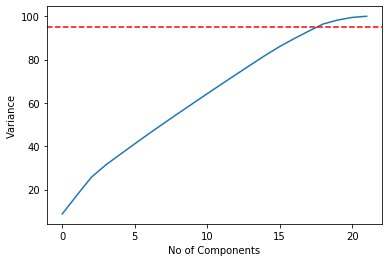

In [226]:
# lets apply PCA
nforpca(xs)

In [227]:
for i in range(16,23):
    print(i," ",modified_pca(dt,xs,y,i))

16   0.3397693179105774
17   0.3342115234375016
18   0.32433587055668545
19   0.3413401312170862
20   0.3455045117730414
21   0.3415932336024545
22   0.3354218933895915


In [229]:
# we won't use PCA

In [230]:
# lets tune the model

In [234]:
DecisionTreeRegressor?

In [233]:
param_dt={'criterion':['friedman_mse','mse','mae'],'splitter':['random','best'],'max_features':['auto','sqrt','log2'],
          'presort':[True,False]}
randomcv(dt,param_dt,x,y)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   27.3s finished


{'splitter': 'best',
 'presort': False,
 'max_features': 'auto',
 'criterion': 'mse'}

In [235]:
# only max_features is changed, rest all are default values

In [236]:
dt1=DecisionTreeRegressor(random_state=45,max_features= 'auto')

In [237]:
param_dt1={'max_depth':[2,4,8,12],'min_samples_split':[2,4,8,12],'min_samples_leaf':[1,4,8,12],
          'min_weight_fraction_leaf':[0.0,0.1,0.2,0.3],'max_leaf_nodes':[5,10,15,20]}
randomcv(dt1,param_dt1,x,y)

Fitting 3 folds for each of 75 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    5.8s finished


{'min_weight_fraction_leaf': 0.0,
 'min_samples_split': 8,
 'min_samples_leaf': 4,
 'max_leaf_nodes': 20,
 'max_depth': 8}

In [239]:
param_dt2={'max_depth':[4,6,8,10],'min_samples_split':[4,6,8,10],'min_samples_leaf':[2,4,5,6],
          'min_weight_fraction_leaf':[0.0,0.1],'max_leaf_nodes':[15,20,25,30]}
randomcv(dt1,param_dt2,x,y)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    8.7s finished


{'min_weight_fraction_leaf': 0.0,
 'min_samples_split': 10,
 'min_samples_leaf': 6,
 'max_leaf_nodes': 30,
 'max_depth': 8}

In [240]:
param_dt3={'max_depth':[6,7,8,9],'min_samples_split':[9,10,11,12],'min_samples_leaf':[4,5,6,7,8],
          'max_leaf_nodes':[25,30,35,40]}
gridcv(dt1,param_dt3,x,y)

Fitting 4 folds for each of 320 candidates, totalling 1280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 576 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 1080 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 1280 out of 1280 | elapsed:   17.8s finished


{'max_depth': 9,
 'max_leaf_nodes': 40,
 'min_samples_leaf': 4,
 'min_samples_split': 9}

In [241]:
param_dt4={'max_depth':[8,9,10,11],'min_samples_split':[9,10,11],'min_samples_leaf':[4,5,6],
          'max_leaf_nodes':[36,37,38,40]}
gridcv(dt1,param_dt4,x,y)

Fitting 4 folds for each of 144 candidates, totalling 576 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed:    8.4s finished


{'max_depth': 10,
 'max_leaf_nodes': 40,
 'min_samples_leaf': 4,
 'min_samples_split': 9}

In [250]:
param_dt5={'max_depth':[9,10,11,12],'min_samples_split':[5,6,7,8,9],'min_samples_leaf':[4,5,6,7,8],
          'max_leaf_nodes':[67,69,70,71,72]}
gridcv(dt1,param_dt5,x,y)

Fitting 4 folds for each of 500 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 576 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 1080 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 1728 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:   30.3s finished


{'max_depth': 10,
 'max_leaf_nodes': 70,
 'min_samples_leaf': 6,
 'min_samples_split': 5}

In [251]:
dt2=DecisionTreeRegressor(random_state=45,max_features= 'auto',max_depth= 10,
 max_leaf_nodes= 70,
 min_samples_leaf= 6,
 min_samples_split= 5)
get_score(dt2,x,y)

(0.8743427721675018, 0.8350458433087682, 93.04861113698058)

In [252]:
# the score improved

In [265]:
# lets boost dt2,x,y
adadt=AdaBoostRegressor(base_estimator=dt2, random_state=45, n_estimators=50, learning_rate=0.1)
get_score(adadt,x,y)

(0.8901819915726074, 0.8474223241607323, 89.12571432952245)

In [266]:
# the score improved

In [267]:
# lets cross val adadt,x,y
for i in range(3,15):
    print(i, " ", cross(adadt,x,y,i))

3   (0.8608495454976254, 0.004629169427159797)
4   (0.8604218809105154, 0.005060866608259504)
5   (0.860256763388038, 0.005051729182201215)
6   (0.861097775445435, 0.00837639791070735)
7   (0.8606208796430933, 0.006298725954685699)
8   (0.8602162799803462, 0.00820453566876985)
9   (0.8611282050927684, 0.00823378711518916)
10   (0.8604708907954397, 0.006657936790815547)
11   (0.8609723535929793, 0.00969723001834346)
12   (0.8610783445721745, 0.010990556343199039)
13   (0.8601889215239477, 0.009480616934421503)
14   (0.8609106796057738, 0.00797832960586116)


In [268]:
# the best score is at cv=9

In [270]:
# lets pred values and evaluate metrics
crosspred=cross_val_predict(adadt,x,y,cv=9)

In [271]:
# Evaluation metrics
mse=mean_squared_error(y,crosspred)
mae=mean_absolute_error(y,crosspred)
rmse=np.sqrt(mean_squared_error(y,crosspred))
print('Mean_Squared_Error: ', mse)
print('Root_Mean_Squared_Error: ', rmse)
print('Mean_Absolute_Error: ', mae)

Mean_Squared_Error:  8007.662428453974
Root_Mean_Squared_Error:  89.48554312543436
Mean_Absolute_Error:  69.48407819590102


In [272]:
# the error of adadt is less than the cross validated model

# XGB

In [273]:
# XGB with xs (0.9720815188198897, 0.8440194306935442, 91.42607245167243)

In [274]:
# xgb=XGBRegressor(n_jobs=-1,random_state=45)

In [275]:
# Individual Model Pipeline:

# 1. feature selection
# 2. Hyper parameter tuning
# 3. Boosting
# 4. Cross Validation
# 5. Evaluation Metrics

In [276]:
# lets apply bfe
modified_bfe(xgb,xs,y,20)

0.8460947919079929

In [277]:
# took around 3 minutes

In [278]:
modified_bfe(xgb,xs,y,19)

0.8475590323509847

In [279]:
# took around 5 mins

In [280]:
modified_bfe(xgb,xs,y,18)

0.8458918867970479

In [281]:
modified_bfe(xgb,xs,y,21)

0.8436387432357715

In [282]:
# the best value at k=19

In [283]:
# lets apply pca
for i in range(16,23):
    print(i," ",modified_pca(xgb,xs,y,i))

16   0.5763376694042774
17   0.5573983966857308
18   0.5608802058318805
19   0.5896483368071839
20   0.6545214170594341
21   0.6431161339930365
22   0.6394002700926646


In [284]:
# we won't use pca

In [285]:
xsb=bfe(xgb,xs,y,19)
xsb.head(1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:  1.6min finished

[2020-03-26 17:56:14] Features: 21/19 -- score: 0.856886066777611[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:  1.5min finished

[2020-03-26 17:57:44] Features: 20/19 -- score: 0.8570040607333205[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.3min finished

[2020-03-26 17:59:03] Features: 19/19 -- score: 0.8577312135066997

,State_Code,Claim_Amount,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location_Code,Marital_Status,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Policy_Type,Claim_Reason,Sales_Channel,Vehicle_Class,Vehicle_Size
0,-0.55069,-1.044476,-0.408822,-0.732899,-1.124597,-0.612669,-0.980269,0.612827,0.034524,-0.188771,-0.791655,1.678099,-1.543287,-0.42225,-1.735273,-0.946485,-1.031138,1.499181,-0.166682


In [286]:
# now, lets tune xgb,xsb,y

In [293]:
XGBRegressor?

In [294]:
param_xgb={'booster':['gbtree', 'gblinear', 'dart'],'importance_type':["gain", "weight", "cover", "total_gain","total_cover"]}
randomcv(xgb,param_xgb,xsb,y)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   53.9s finished


{'importance_type': 'gain', 'booster': 'gbtree'}

In [291]:
xgb1=XGBRegressor(n_jobs=-1,random_state=45,booster= 'gbtree',importance_type= 'gain')

In [292]:
param_xgb1={'max_depth':[2,4,8,12],'learning_rate':[0.001,0.01,0.1,1,2],'gamma':[0.1,0.5,1,1.5],'min_child_weight':[1,2,4,8],
           'reg_alpha':[0.1,0.5,1],'reg_lambda':[0.1,0.5,1]}
randomcv(xgb1,param_xgb1,xsb,y)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   47.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  5.4min finished


{'reg_alpha': 0.5,
 'min_child_weight': 4,
 'max_depth': 8,
 'learning_rate': 0.1,
 'gamma': 0.1}

In [295]:
param_xgb2={'gamma':[0.01,0.1,1,2,4,8],
            'min_child_weight':[2,4,8,12,16],
           'reg_alpha':[0.1,1,2,4]}
randomcv(xgb1,param_xgb2,xsb,y)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   48.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  5.0min finished


{'reg_alpha': 2, 'min_child_weight': 12, 'gamma': 4}

In [296]:
param_xgb3={'max_depth':[6,7,8,9,10],'learning_rate':[0.05,0.1,0.2,0.4],'gamma':[3,4,5,6],
            'min_child_weight':[9,10,12,14],
           'reg_alpha':[1,2,2.5,3],'reg_lambda':[1,2,2.5,3]}
randomcv(xgb1,param_xgb3,xsb,y)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  6.6min finished


{'reg_lambda': 2,
 'reg_alpha': 2.5,
 'min_child_weight': 12,
 'max_depth': 9,
 'learning_rate': 0.05,
 'gamma': 5}

In [297]:
param_xgb4={'learning_rate':[0.05,0.06,0.08],
            'min_child_weight':[10,11,12,13],
           'reg_alpha':[2,2.3,2.5],'reg_lambda':[2,2.3,2.5]}
randomcv(xgb1,param_xgb4,xsb,y)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   49.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  5.1min finished


{'reg_lambda': 2.5,
 'reg_alpha': 2.5,
 'min_child_weight': 10,
 'learning_rate': 0.08}

In [298]:
param_xgb5={'max_depth':[8,9,10],'learning_rate':[0.07,0.08,0.09],'gamma':[4,5,6],
            'min_child_weight':[9,10,11],
           'reg_alpha':[2.3,2.5,2.7],'reg_lambda':[2.3,2.5,2.7]}
gridcv(xgb1,param_xgb5,xsb,y)

Fitting 4 folds for each of 729 candidates, totalling 2916 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed: 21.0min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 26.7min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 33.0min
[Parallel(n_jobs=-1)]: Done 2170 tasks      | elapsed: 40.5min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 48.8min
[Parallel(n_jobs=-1)]: Done 2916 out of 2916 | elapsed: 54.9min finished


{'gamma': 4,
 'learning_rate': 0.08,
 'max_depth': 8,
 'min_child_weight': 11,
 'reg_alpha': 2.7,
 'reg_lambda': 2.5}

In [299]:
xgb2=XGBRegressor(n_jobs=-1,random_state=45,booster= 'gbtree',importance_type= 'gain',gamma= 4,
 learning_rate= 0.08,
 max_depth= 8,
 min_child_weight= 11,
 reg_alpha= 2.7,
 reg_lambda= 2.5)

In [300]:
param_xgb6={'n_estimators':range(50,400,100)}
gridcv(xgb2,param_xgb6,xsb,y)

Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  16 | elapsed:   31.6s remaining:    7.2s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:   36.0s finished


{'n_estimators': 150}

In [301]:
param_xgb7={'n_estimators':range(150,800,100)}
gridcv(xgb2,param_xgb7,xsb,y)

Fitting 4 folds for each of 7 candidates, totalling 28 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   29.6s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:  2.0min finished


{'n_estimators': 150}

In [304]:
param_xgb7={'n_estimators':range(60,160,10)}
gridcv(xgb2,param_xgb7,xsb,y)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   44.0s finished


{'n_estimators': 70}

In [305]:
xgb3=XGBRegressor(n_jobs=-1,random_state=45,booster= 'gbtree',importance_type= 'gain',gamma= 4,
 learning_rate= 0.08,
 max_depth= 8,
 min_child_weight= 11,
 reg_alpha= 2.7,
 reg_lambda= 2.5,n_estimators= 70)
get_score(xgb3,xsb,y)

(0.9235451090046547, 0.8503436285125556, 87.67797695819664)

In [306]:
# the score improved a little

In [307]:
xgb4=XGBRegressor(n_jobs=-1,random_state=45,booster= 'gbtree',importance_type= 'gain',gamma= 3.5,
 learning_rate= 0.08,
 max_depth= 7,
 min_child_weight= 12,
 reg_alpha= 2.8,
 reg_lambda= 2.5,n_estimators= 70)
get_score(xgb4,xsb,y)

(0.9098905535955636, 0.849053545237271, 87.69784703823375)

In [308]:
# xgb3 is the best

In [315]:
# lets boost xgb3,xsb,y
adaxgb=AdaBoostRegressor(base_estimator=xgb3, random_state=45, n_estimators=50, learning_rate=0.02)
get_score(adaxgb,xsb,y)

(0.9309986018557771, 0.8543501967632736, 86.51693385133379)

In [316]:
# the score improved

In [317]:
# lets cross validate adaxgb,xsb,y
for i in range(3,15):
    print(i, " ", cross(adaxgb,xsb,y,i))

3   (0.8684048401583769, 0.006622810388079498)
4   (0.868945128351268, 0.005861670127818881)
5   (0.8690561195992806, 0.006358254219298211)
6   (0.8702187924397388, 0.00967593044241642)
7   (0.8700645139781041, 0.009006413545338989)
8   (0.8698147248664538, 0.008645668813752573)
9   (0.8699789950460759, 0.009903327873526104)
10   (0.87069891815845, 0.008159576715486085)
11   (0.8702545610337544, 0.01152043042283097)
12   (0.8701266013616418, 0.012759438462328215)
13   (0.8704672785575457, 0.010908935679701706)
14   (0.8706149334198402, 0.010539390999862824)


In [318]:
# max score at cv=10

In [319]:
# lets draw the predictions
crosspredxgb=cross_val_predict(adaxgb,xsb,y,cv=10)

In [320]:
# Evaluation metrics
mse=mean_squared_error(y,crosspredxgb)
mae=mean_absolute_error(y,crosspredxgb)
rmse=np.sqrt(mean_squared_error(y,crosspredxgb))
print('Mean_Squared_Error: ', mse)
print('Root_Mean_Squared_Error: ', rmse)
print('Mean_Absolute_Error: ', mae)

Mean_Squared_Error:  7466.989189262417
Root_Mean_Squared_Error:  86.41174219550498
Mean_Absolute_Error:  62.81655520974914


# Saving the model

In [321]:
# the best model is cross validated adaxgb

In [322]:
predic=pd.DataFrame(crosspredxgb)
predic.to_csv('pred_claim.csv')

In [323]:
cv_results = cross_validate(adaxgb, xsb ,y, cv=10, return_estimator=True)
ada_fit = cv_results['estimator']
ada_fit=ada_fit[0]

In [324]:
import joblib
joblib.dump(ada_fit,'adaxgb_claim.pkl')

['adaxgb_claim.pkl']